In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../../..')
from omama import gp2
from omama.gp2 import Runner
# import gp2
# from gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

2023-07-26 21:19:21.138072: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [3]:
R = Runner(verbose=False)

In [4]:
C = gp2.KATTUnet2D(
    filter_num=[16, 32, 64, 128, 256, 512],
    stack_num_down=2,
    stack_num_up=2,
    activation='ReLU',
    atten_activation='ReLU',
    attention='add',
    output_activation='Sigmoid',
    batch_norm=True,
    pool=True,
    unpool=False,
    weights='imagenet',
    optimizer= None, #None = default is optimizers.Adam(learning_rate=1e-3)
    loss=None, #None = default is losses.binary_crossentropy
    metric=None, # None = default is Util.dice_coef
    workingdir=R.workingdir
            
)

2023-07-26 21:19:27.086392: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-07-26 21:19:27.327703: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-07-26 21:19:27.330293: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-07-26 21:19:27.332871: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 2 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-07-26 21:19:27.33

*** GP2 KATTUNet2D ***
Working directory: /tmp/tmpy8ezjssmGP2


2023-07-26 21:19:27.355949: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-26 21:19:27.677218: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-07-26 21:19:27.679648: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-07-26 21:19:27.682045: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 2 

In [5]:
R.classifier = C

In [6]:
# load our dataset  (images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_masks.npy')

In [7]:
images.shape

(12311, 512, 512, 1)

In [8]:
masks.shape

(12311, 512, 512, 1)

In [9]:
images = images[:10000]

In [10]:
masks = masks[:10000]

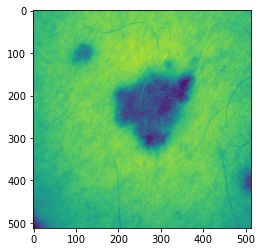

In [11]:
imshow(images[12])

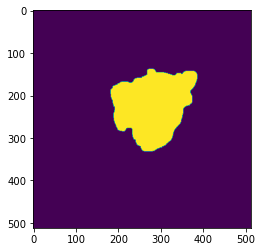

In [12]:
imshow(masks[12])

In [ ]:
R.run(images=images, masks=masks, runs=5, use_multi_gpu=True)

Number of devices: 3
Weights OK!
******
Loop 1
****** TRAINING CLASSIFIER ******


2023-07-26 21:12:22.163497: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-07-26 21:12:22.183003: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245755000 Hz


Epoch 1/100


2023-07-26 21:12:24.620306: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-07-26 21:12:25.314003: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-07-26 21:12:25.955084: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-07-26 21:12:25.955110: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-07-26 21:12:25.955167: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-07-26 21:12:26.088545: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-07-26 21:12:26.782467: I tensorflow/stream_exec

8/8 [==============================] - 32s 3s/step - loss: 0.6670 - dice_coeff: 0.3584 - val_loss: 0.6916 - val_dice_coeff: 0.3571


2023-07-26 21:12:58.288847: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/100
8/8 [==============================] - 9s 1s/step - loss: 0.5888 - dice_coeff: 0.3979 - val_loss: 0.6867 - val_dice_coeff: 0.3560
Epoch 3/100
8/8 [==============================] - 9s 1s/step - loss: 0.5363 - dice_coeff: 0.4329 - val_loss: 0.6814 - val_dice_coeff: 0.3551
Epoch 4/100
8/8 [==============================] - 9s 1s/step - loss: 0.5026 - dice_coeff: 0.4580 - val_loss: 0.6772 - val_dice_coeff: 0.3538
Epoch 5/100
8/8 [==============================] - 9s 1s/step - loss: 0.4756 - dice_coeff: 0.4837 - val_loss: 0.6729 - val_dice_coeff: 0.3523
Epoch 6/100
8/8 [==============================] - 10s 1s/step - loss: 0.4464 - dice_coeff: 0.5079 - val_loss: 0.6674 - val_dice_coeff: 0.3505
Epoch 7/100
8/8 [==============================] - 9s 1s/step - loss: 0.4254 - dice_coeff: 0.5299 - val_loss: 0.6613 - val_dice_coeff: 0.3485
Epoch 8/100
8/8 [==============================] - 9s 1s/step - loss: 0.4003 - dice_coeff: 0.5539 - val_loss: 0.6554 - val_dice_coeff: 0.3461
Epoch

In [15]:
R.classifier_scores

[[0.48461198806762695, 0.2232818752527237],
 [0.4715689718723297, 0.21612341701984406],
 [0.35574275255203247, 0.4173090159893036],
 [0.38270121812820435, 0.5131138563156128],
 [0.24017472565174103, 0.6350151896476746]]

In [16]:
R.discriminator_scores

[[0.0, 1.0],
 [0.04387573152780533, 0.996666669845581],
 [1.8287391662597656, 0.8450000286102295],
 [4.395660400390625, 0.7516666650772095],
 [2.0006003379821777, 0.8333333134651184]]

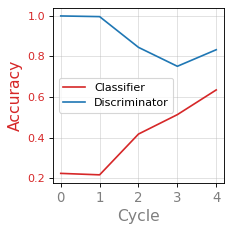

In [17]:
R.plot()